<a href="https://colab.research.google.com/github/ksBrose/3DSGroup_BootcampDataScience/blob/main/atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Data Science - Grupo 3DS

Foram baixados primeiramente os arquivos de dados telemétricos das cidades de Encantado, Muçum e Santa Tereza, no período de 01/08/2023 a 31/10/2023.
Para o município de Santa Tereza, foram baixados dados de 2 estações: Santa Tereza e Linha José Julio.

**Sites Referencia**
- https://www.snirh.gov.br/hidroweb/mapa
- https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

In [3]:
df_Encantado = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86720000-ENCANTADO.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86510000-MUCUM.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472600-SANTA%20TEREZA.csv', encoding='ISO-8859-1', delimiter=';')
df_Lin_JJ = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472000-LINHA%20JOSE%20JULIO.csv', encoding='ISO-8859-1', delimiter=';')

In [4]:
df_Encantado24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Encantado23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')

In [5]:
df_Encantado24 = df_Encantado24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Encantado23 = df_Encantado23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum24 = df_Mucum24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum23 = df_Mucum23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza24 = df_Sta_Tereza24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza23 = df_Sta_Tereza23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio24 = df_Jose_Julio24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio23 = df_Jose_Julio23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)

In [6]:
df_Encantado24.head()

,Data/Hora,Chuva(mm),Nivel(cm),Vazao(m3/s)
0,23/10/2024 15:00,0.0,100.0,0.11
1,23/10/2024 14:45,0.0,100.0,0.11
2,23/10/2024 14:30,0.0,100.0,0.11
3,23/10/2024 14:15,0.0,99.0,NaN
4,23/10/2024 14:00,0.0,99.0,NaN


In [7]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data/Hora    35124 non-null  object 
 1   Chuva(mm)    34991 non-null  float64
 2   Nivel(cm)    25415 non-null  float64
 3   Vazao(m3/s)  26309 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


- Alterar Dtype Data/Hora para variavel datetime

In [8]:
df_Encantado24['Data/Hora'] = pd.to_datetime(df_Encantado24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado23['Data/Hora'] = pd.to_datetime(df_Encantado23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum24['Data/Hora'] = pd.to_datetime(df_Mucum24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum23['Data/Hora'] = pd.to_datetime(df_Mucum23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza24['Data/Hora'] = pd.to_datetime(df_Sta_Tereza24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza23['Data/Hora'] = pd.to_datetime(df_Sta_Tereza23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio24['Data/Hora'] = pd.to_datetime(df_Jose_Julio24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio23['Data/Hora'] = pd.to_datetime(df_Jose_Julio23['Data/Hora'], format='%d/%m/%Y %H:%M')

In [9]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    35124 non-null  datetime64[ns]
 1   Chuva(mm)    34991 non-null  float64       
 2   Nivel(cm)    25415 non-null  float64       
 3   Vazao(m3/s)  26309 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [10]:
print('Quantidade de linhas e colunas:', df_Encantado24.shape)
print('Quantidade de dados nulos:', df_Encantado24.isna().sum().sum())

Quantidade de linhas e colunas: (35125, 4)
Quantidade de dados nulos: 18661


In [70]:
df_Encantado_unico = pd.concat([df_Encantado24, df_Encantado23]).drop_duplicates().reset_index(drop=True)
df_Encantado_unico['Data/Hora'] = pd.to_datetime(df_Encantado_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum_unico = pd.concat([df_Mucum24, df_Mucum23]).drop_duplicates().reset_index(drop=True)
df_Mucum_unico['Data/Hora'] = pd.to_datetime(df_Mucum_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza_unico = pd.concat([df_Sta_Tereza24, df_Sta_Tereza23]).drop_duplicates().reset_index(drop=True)
df_Sta_Tereza_unico['Data/Hora'] = pd.to_datetime(df_Sta_Tereza_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio_unico = pd.concat([df_Jose_Julio24, df_Jose_Julio23]).drop_duplicates().reset_index(drop=True)
df_Jose_Julio_unico['Data/Hora'] = pd.to_datetime(df_Jose_Julio_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64815 entries, 0 to 64814
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


## Grafico 3 meses

In [12]:
df_Encantado['Data_Hora'] = pd.to_datetime(df_Encantado['Data'] + ' ' + df_Encantado['Hora'], format='%d/%m/%Y %H:%M:%S')
df_Encantado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          6071 non-null   object        
 1   Hora          6071 non-null   object        
 2   Chuva (mm)    6071 non-null   object        
 3   Nível (cm)    6071 non-null   object        
 4   Vazão (m3/s)  3709 non-null   object        
 5   Unnamed: 5    0 non-null      float64       
 6   Data_Hora     6071 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 332.1+ KB


Text(0, 0.5, 'Nivel')

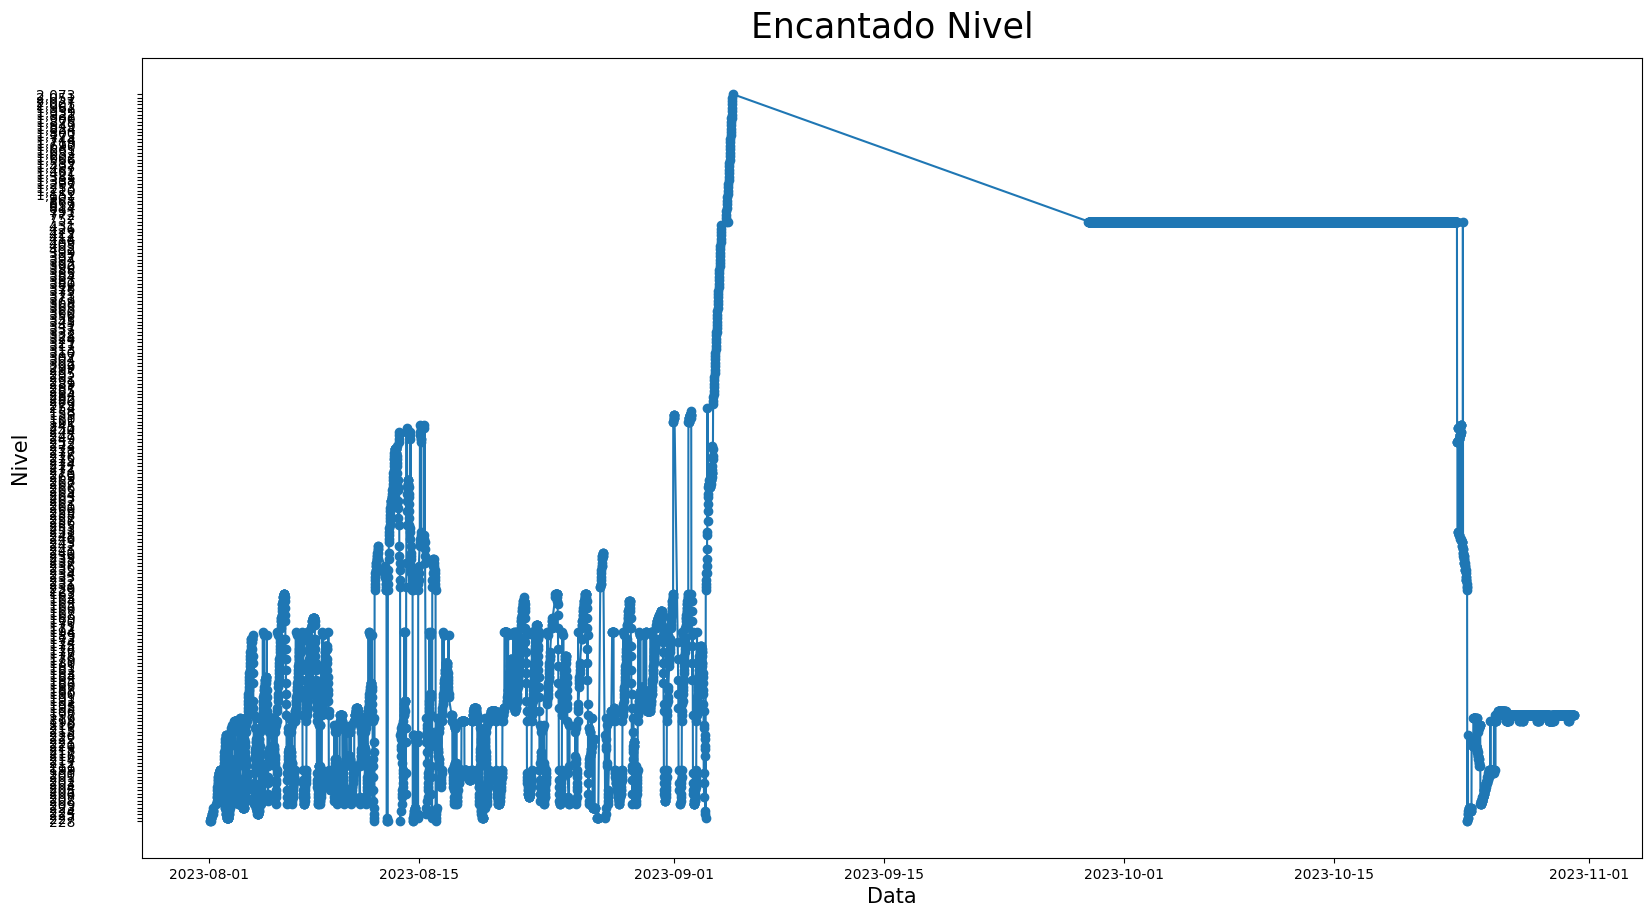

In [13]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

# Plotando graficos Nivel (ano)




In [14]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset):
  fig = plt.figure(figsize=(15,8))
  eixo = fig.add_axes([0,0,1,1])
  eixo.plot(x, y, data = dataset, marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)
  eixo = eixo

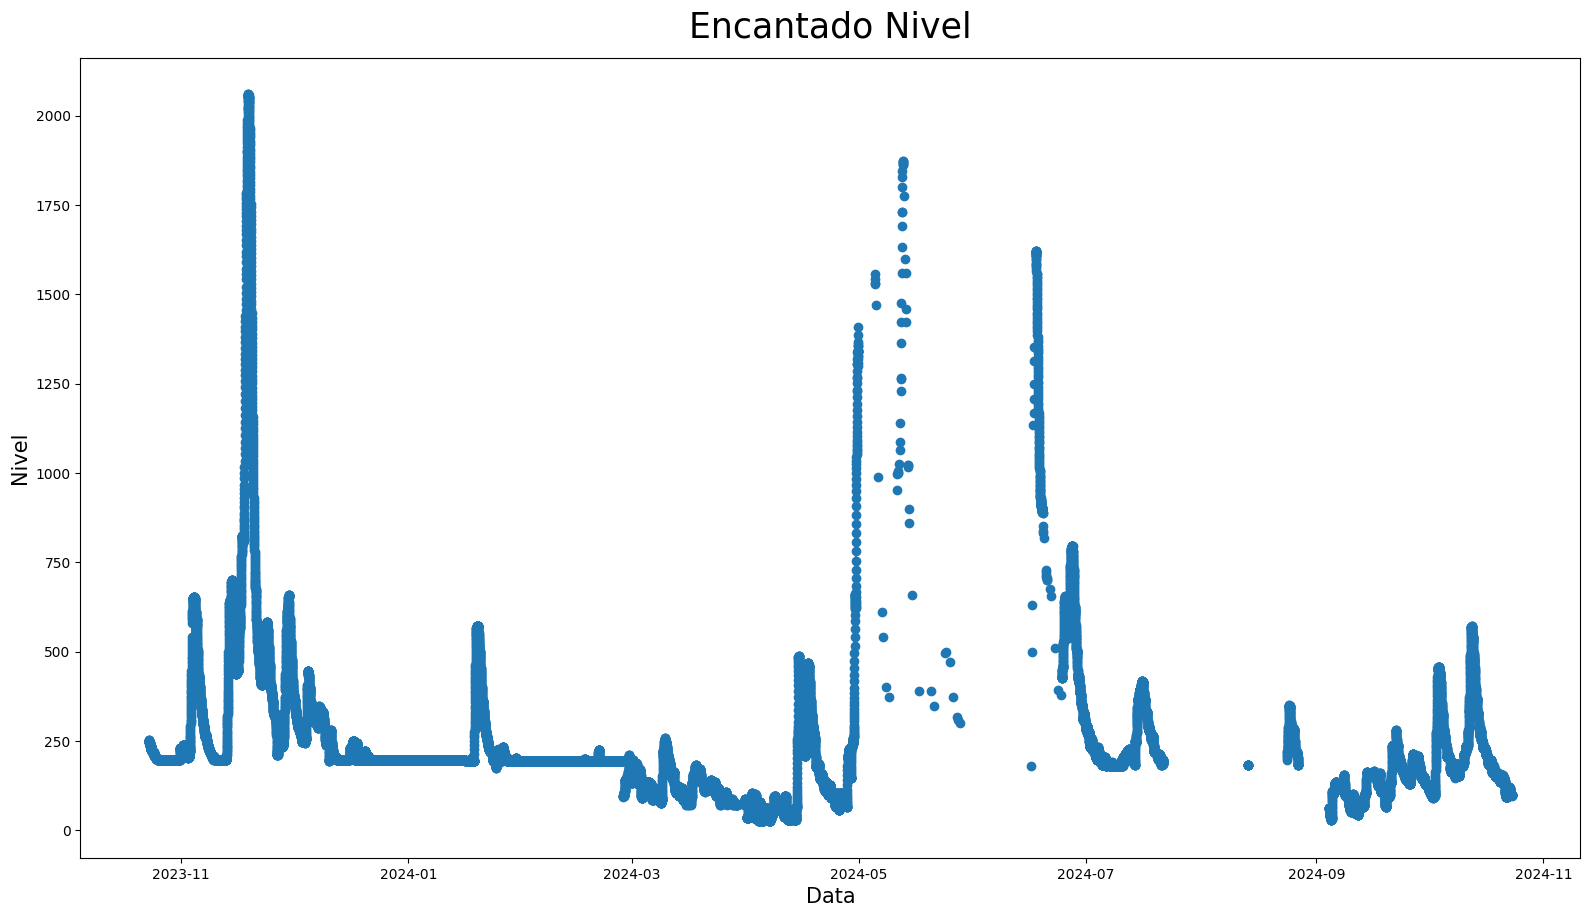

In [15]:
plotar_matplot('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24)

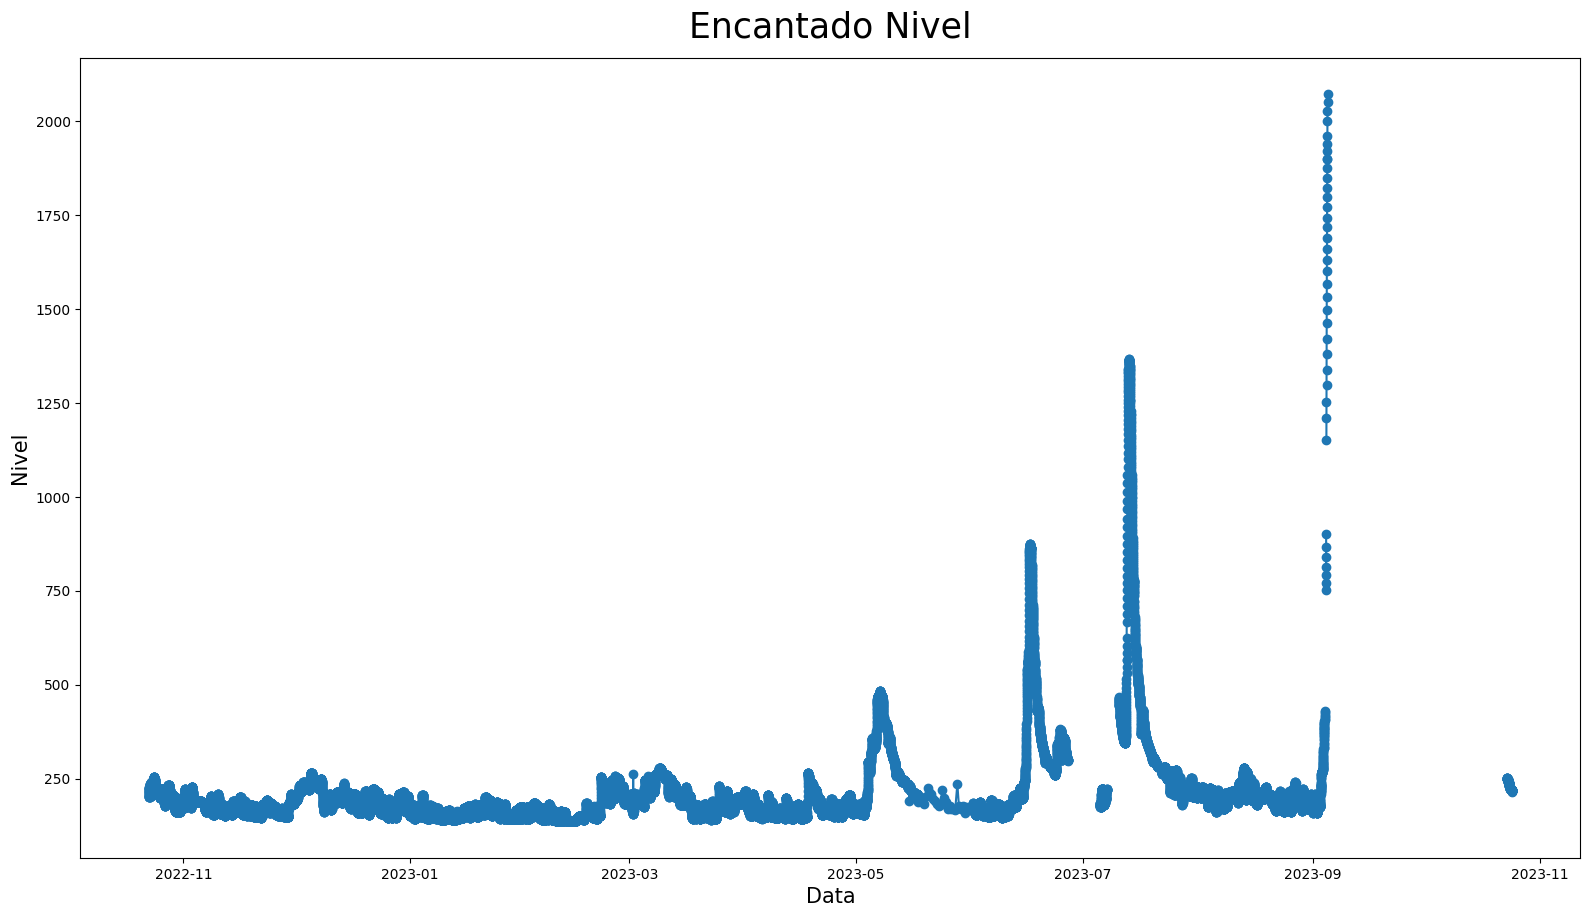

In [16]:
plotar_matplot('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado23)

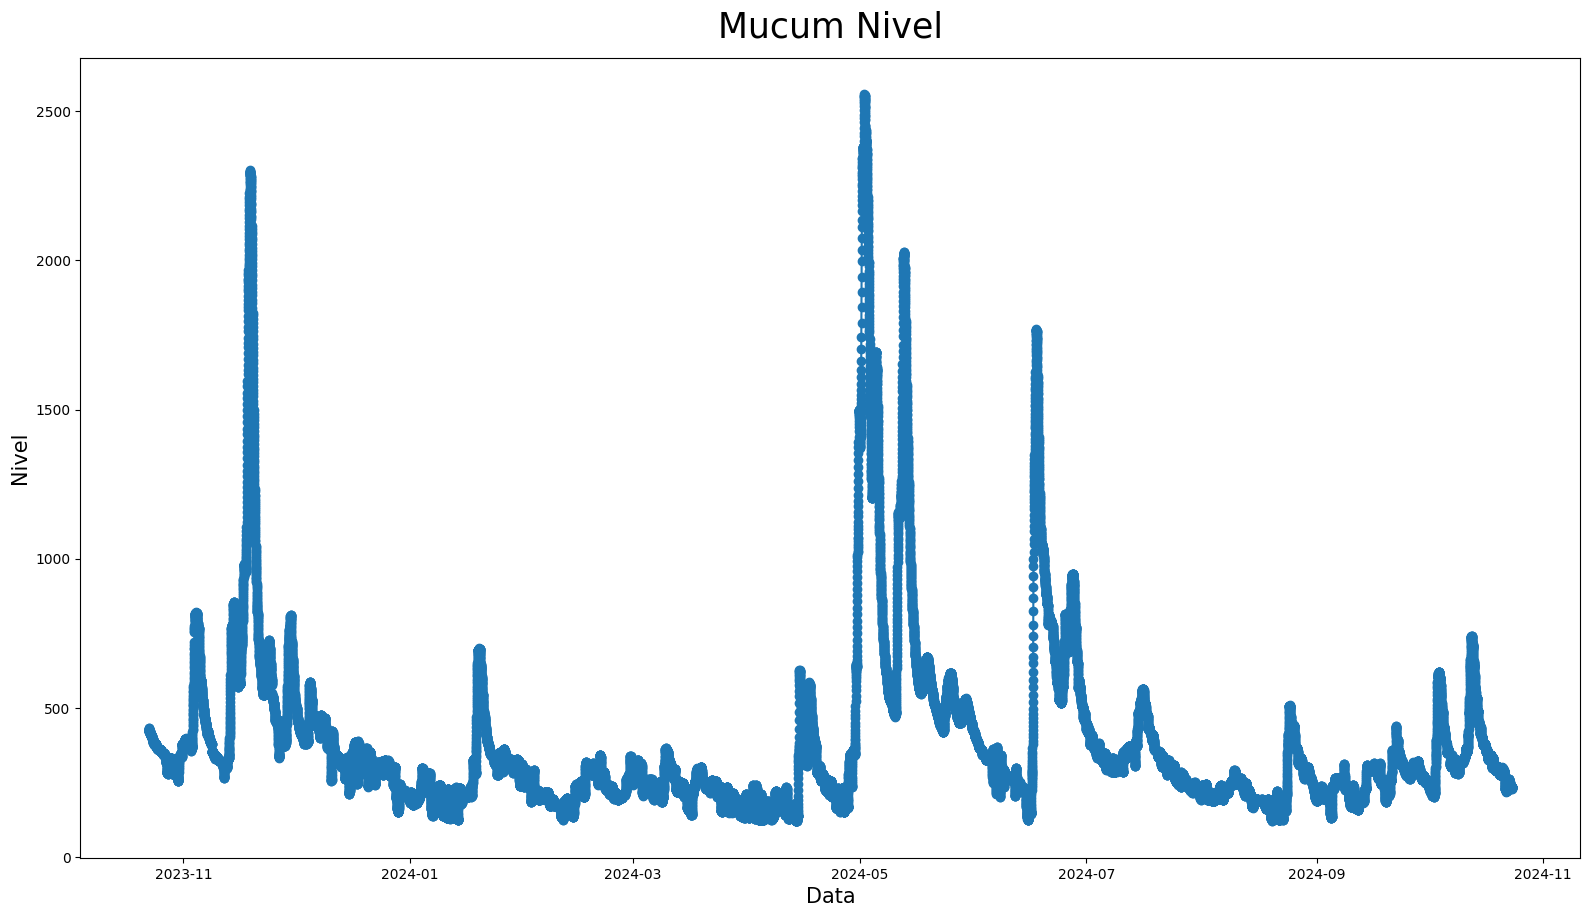

In [17]:
plotar_matplot('Mucum Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum24)

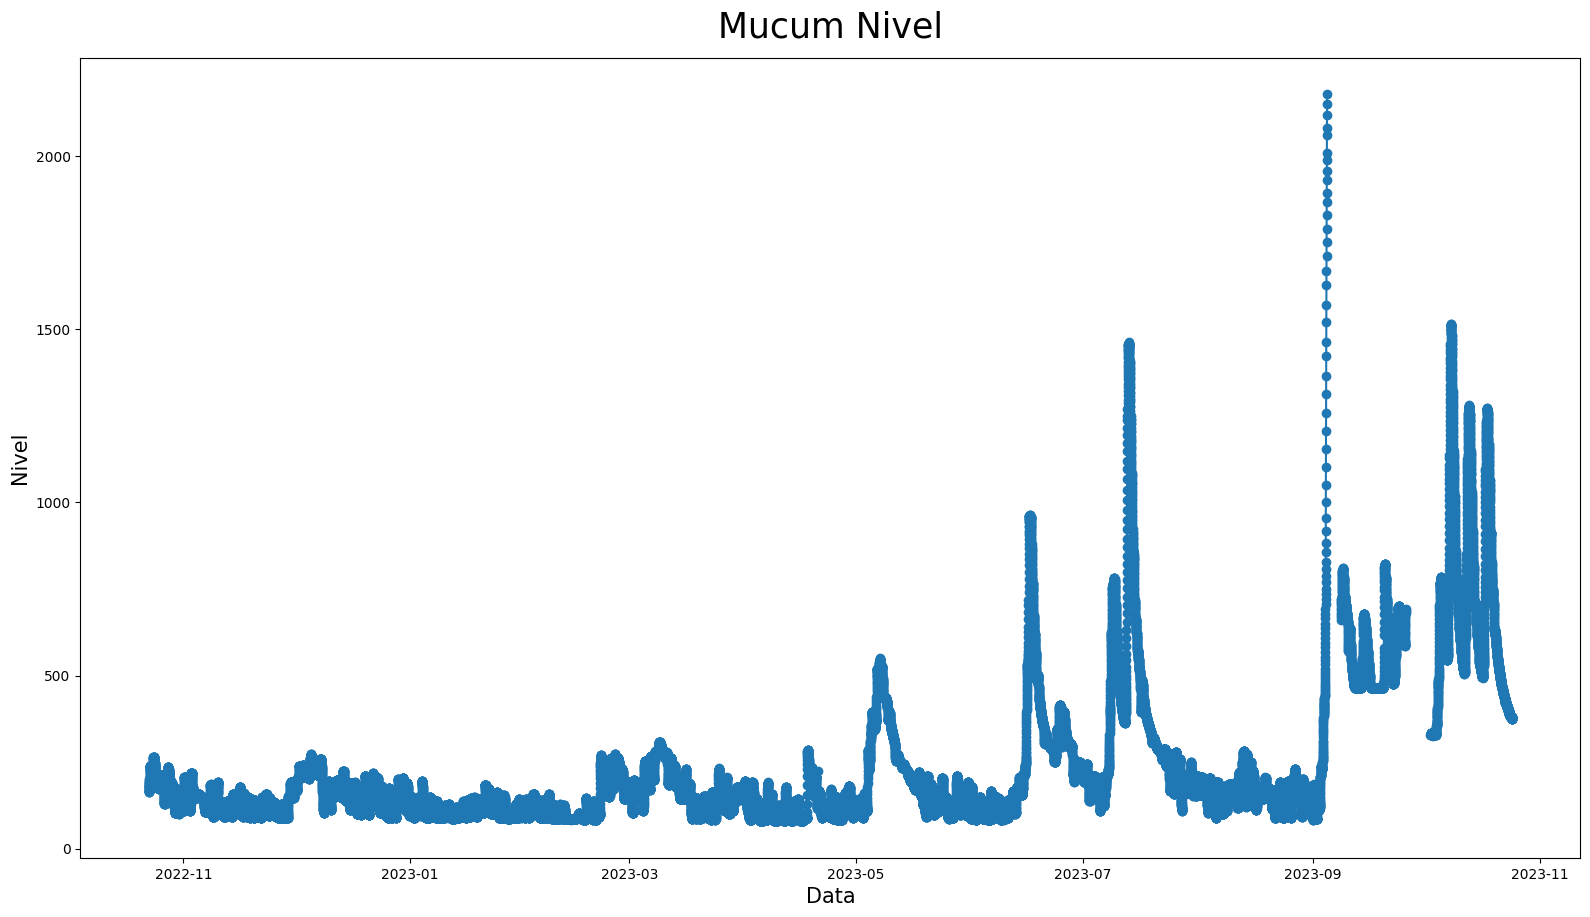

In [18]:
plotar_matplot('Mucum Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum23)

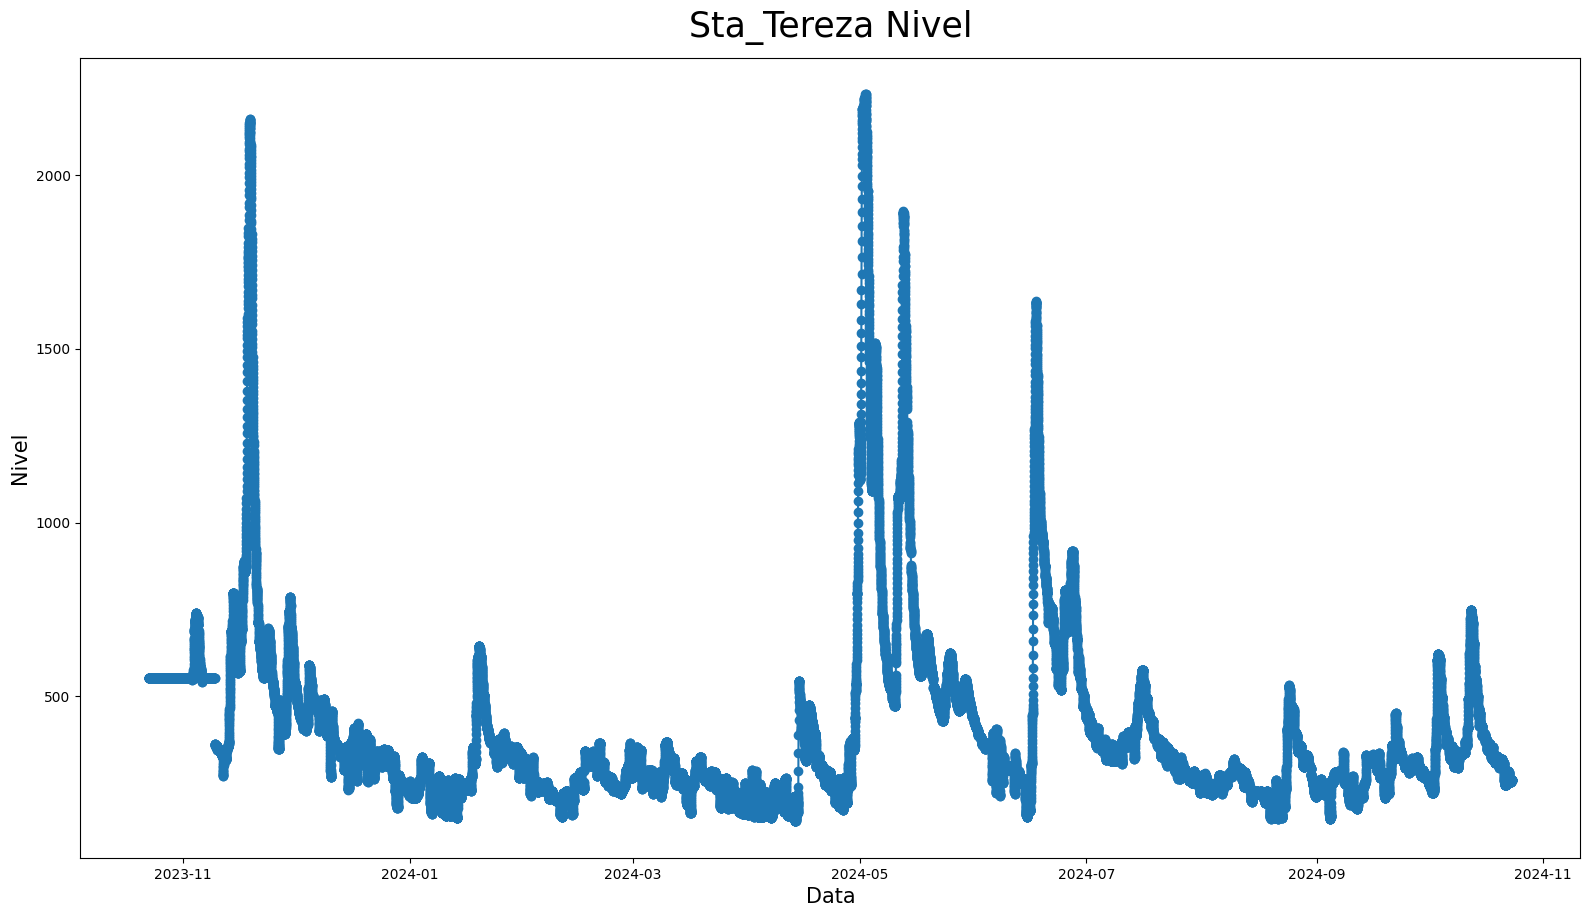

In [19]:
plotar_matplot('Sta_Tereza Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza24)

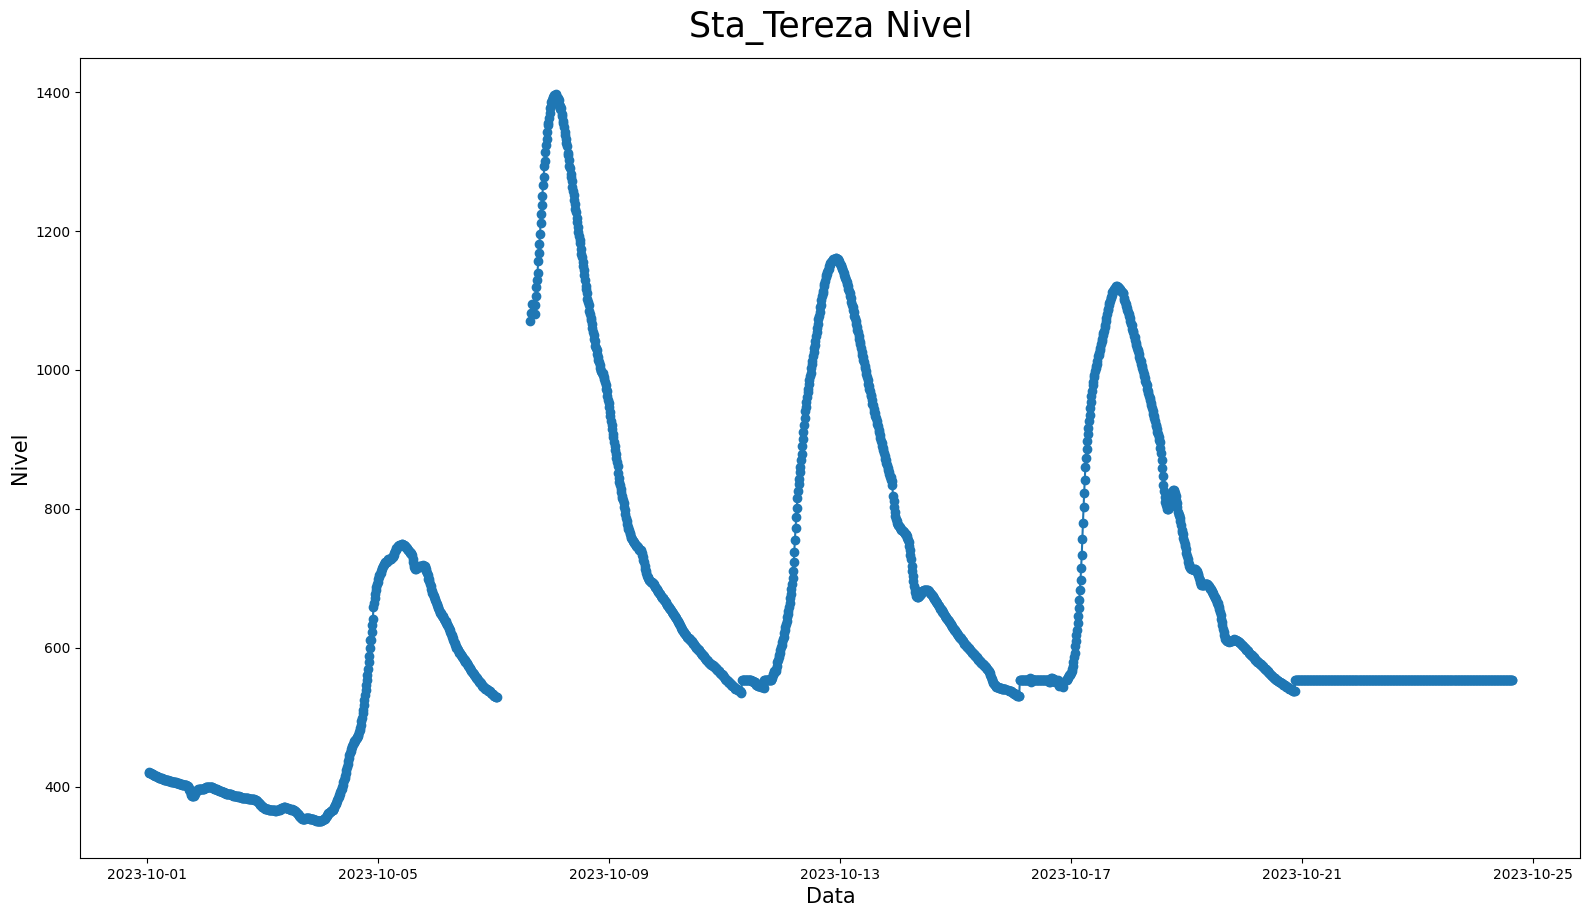

In [20]:
plotar_matplot('Sta_Tereza Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza23)

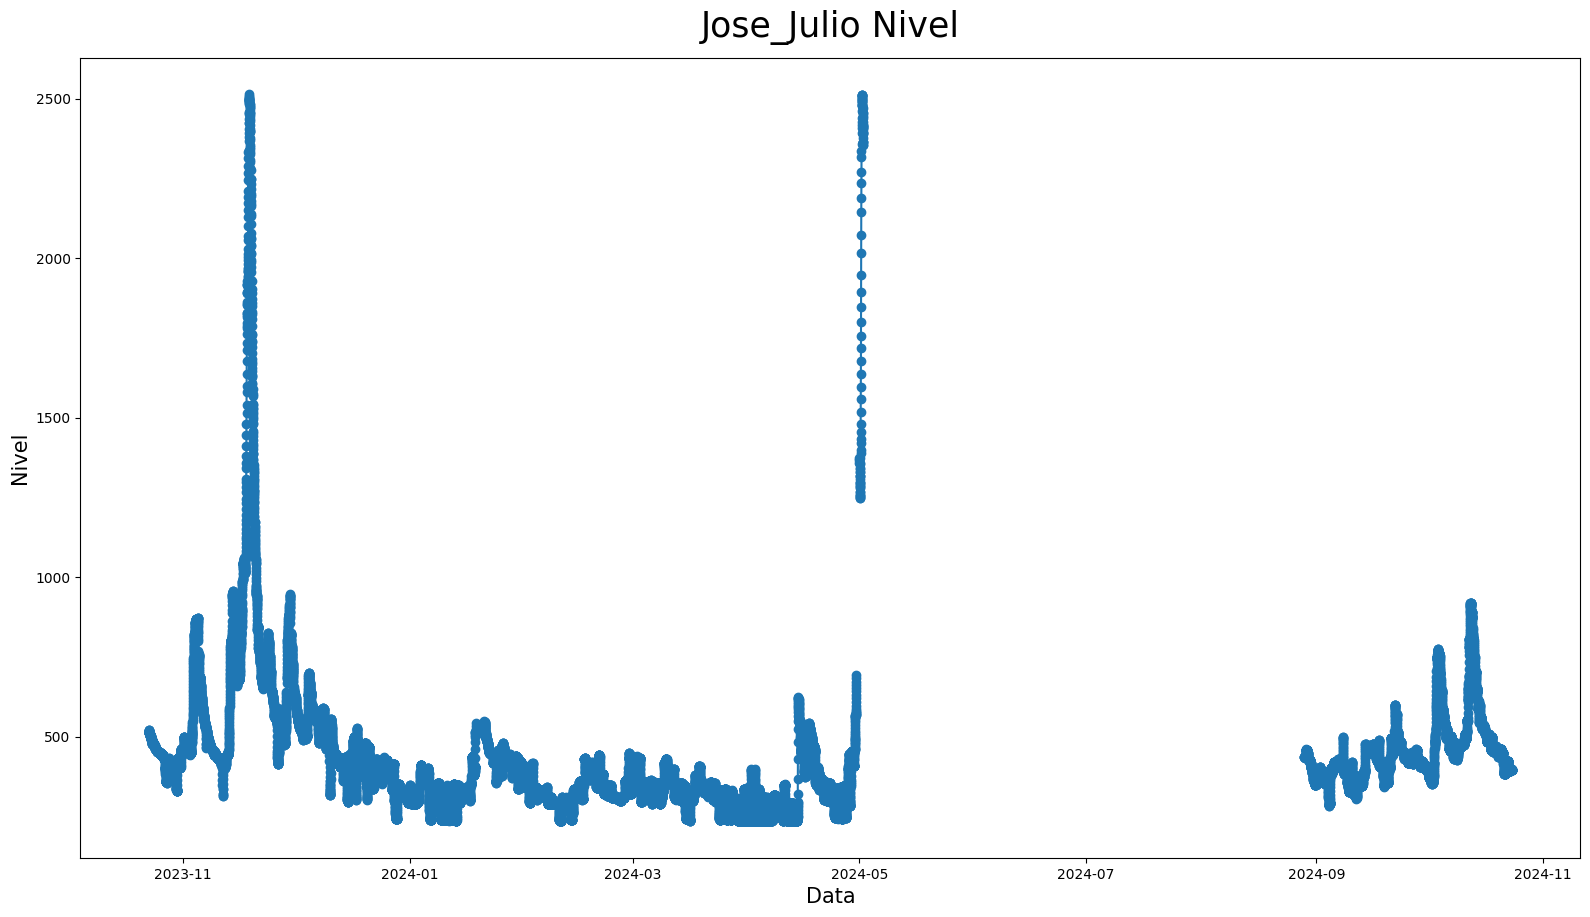

In [21]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio24)

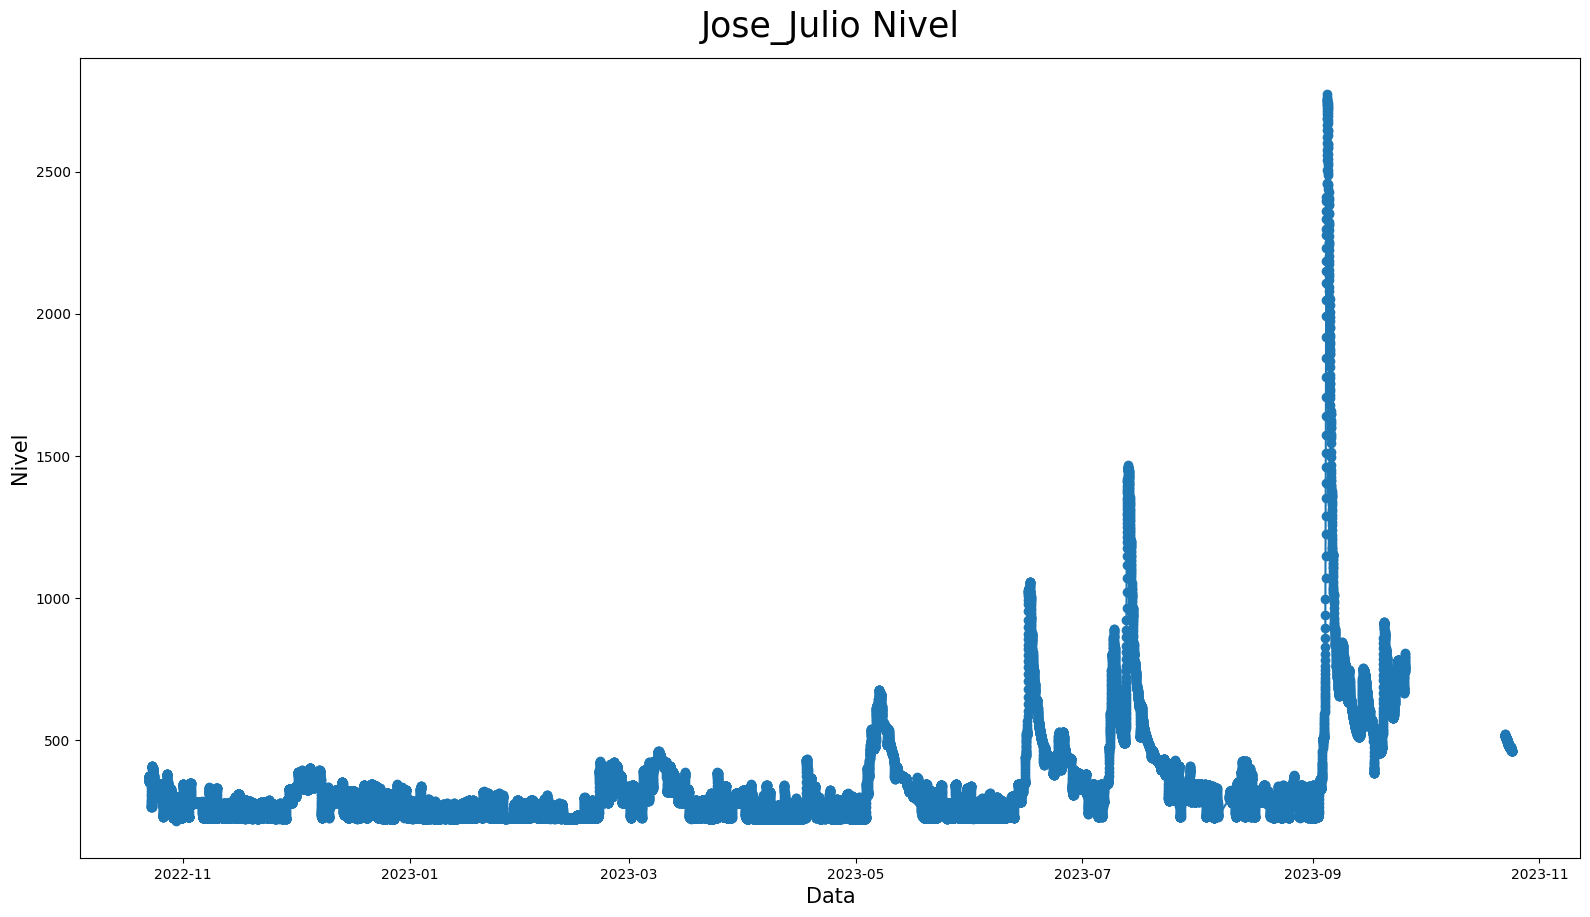

In [22]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio23)

# Plot com seleção de intervalo

In [75]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, label1, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

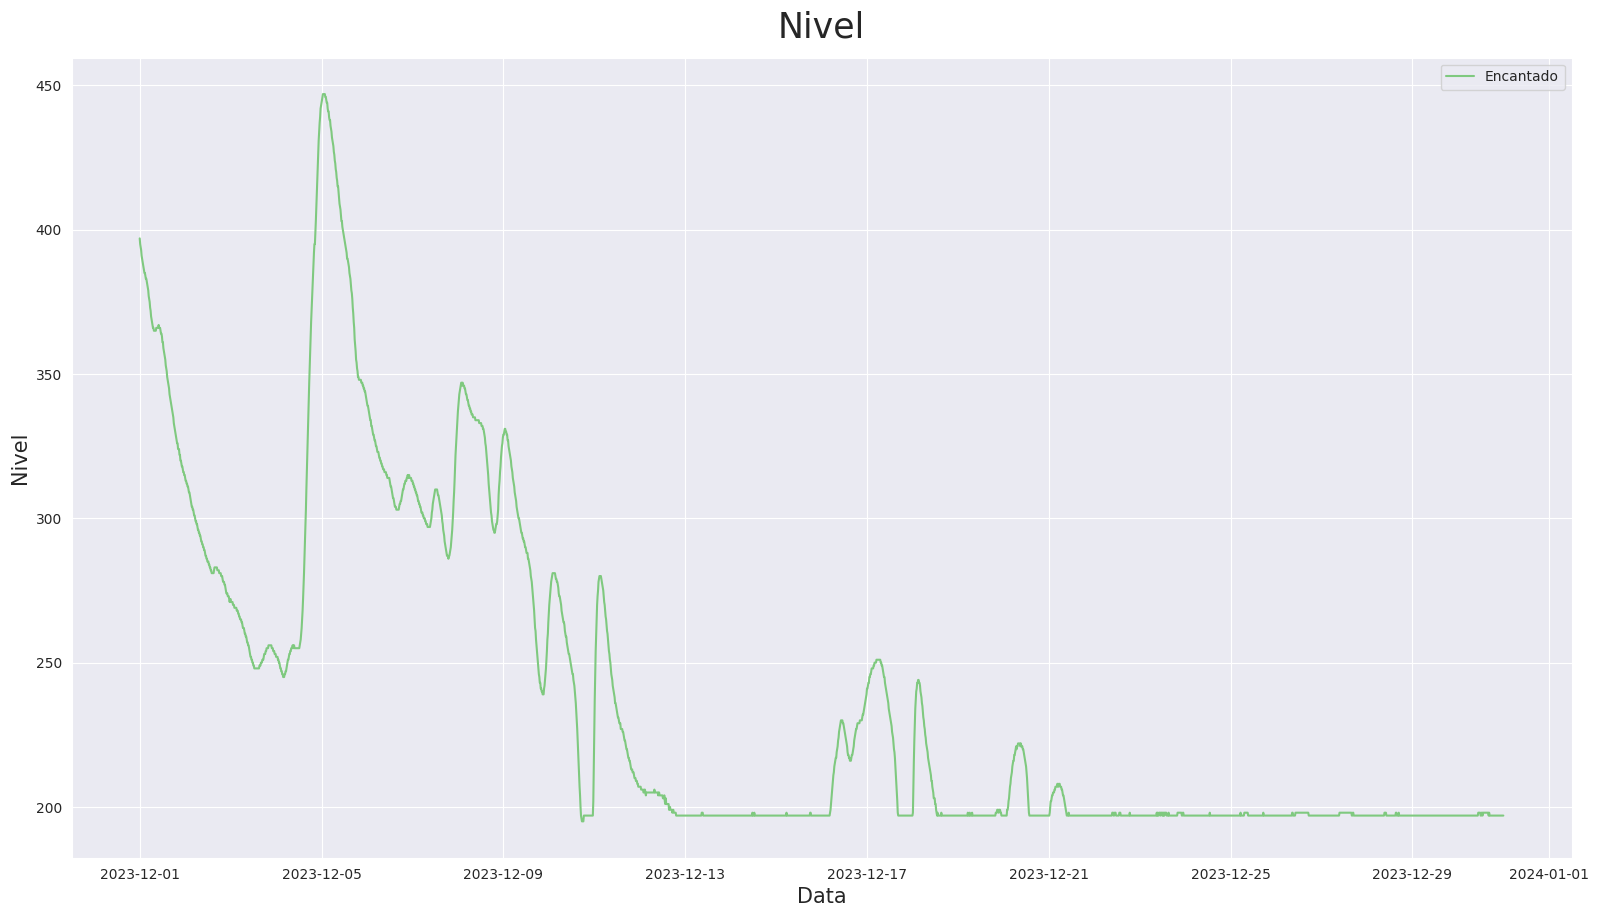

In [76]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico,
                'Encantado',
                intervalo_data=(data_inicio, data_fim))

# 4 Graficos em um plot com seleção de intervalo

In [64]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')
  eixo.plot(x, y, data=dataset2, label=label2, linestyle='-')
  eixo.plot(x, y, data=dataset3, label=label3, linestyle='-')
  eixo.plot(x, y, data=dataset4, label=label4, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

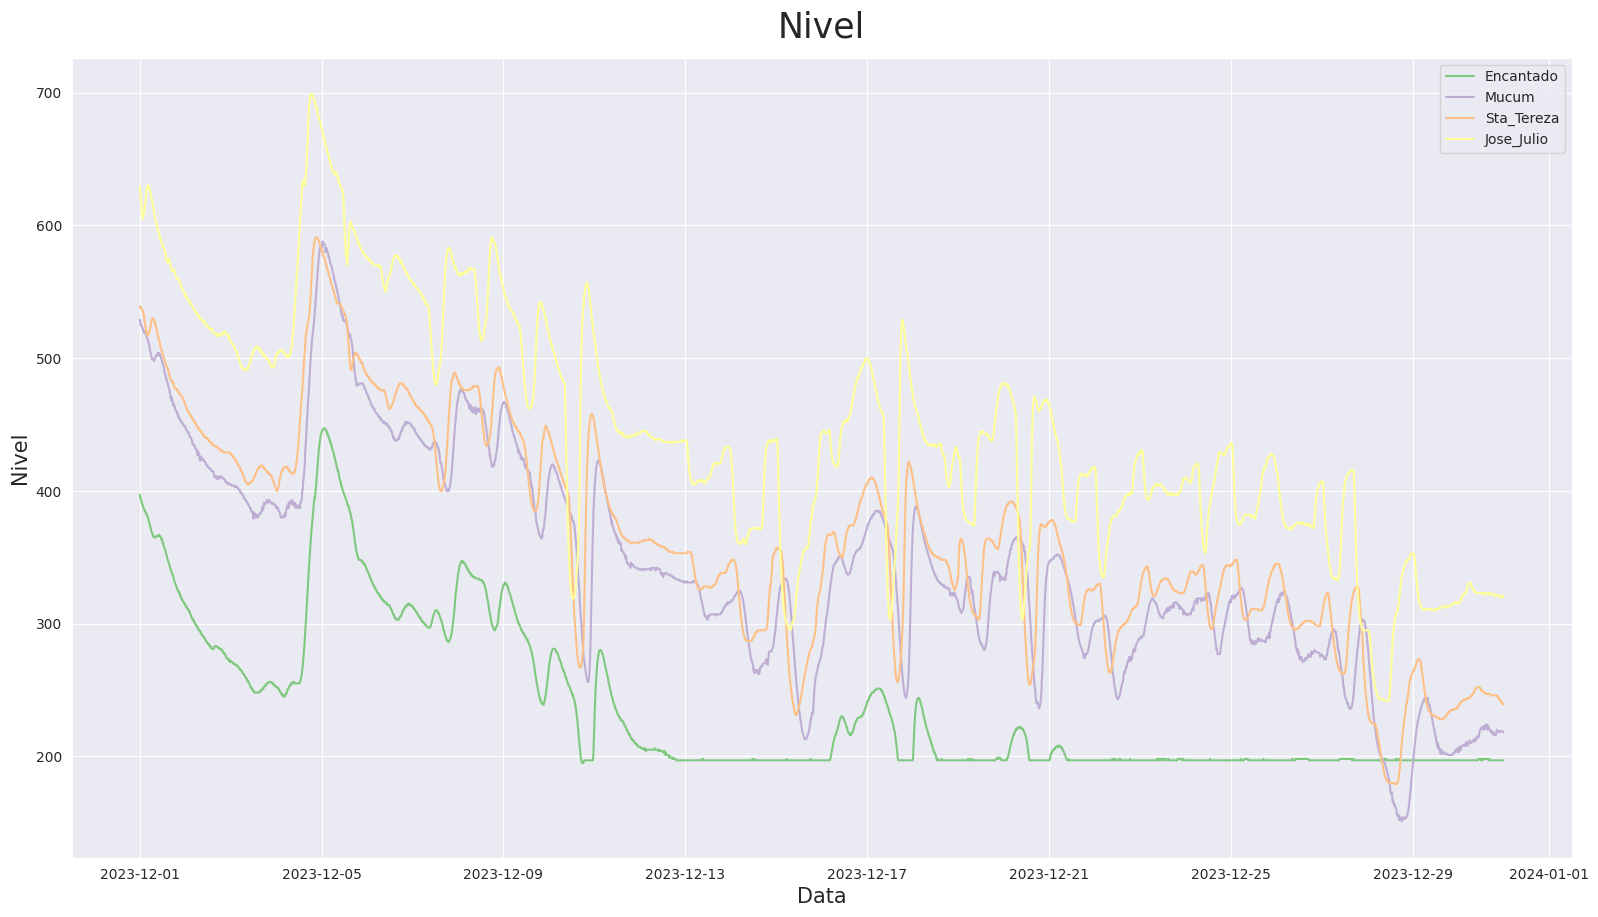

In [74]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

#Plotar Grafico usando SNS

In [23]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(16,9)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

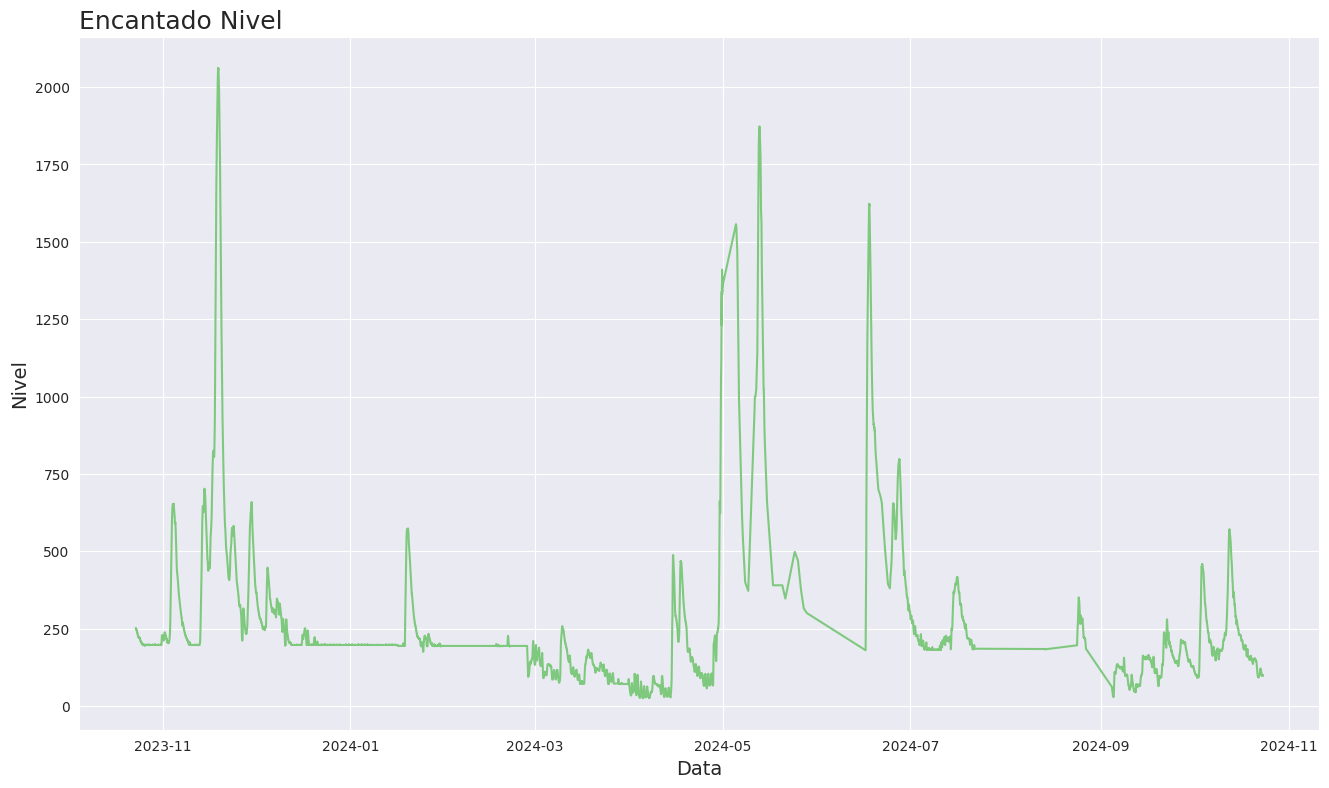

In [24]:
plotar('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24)

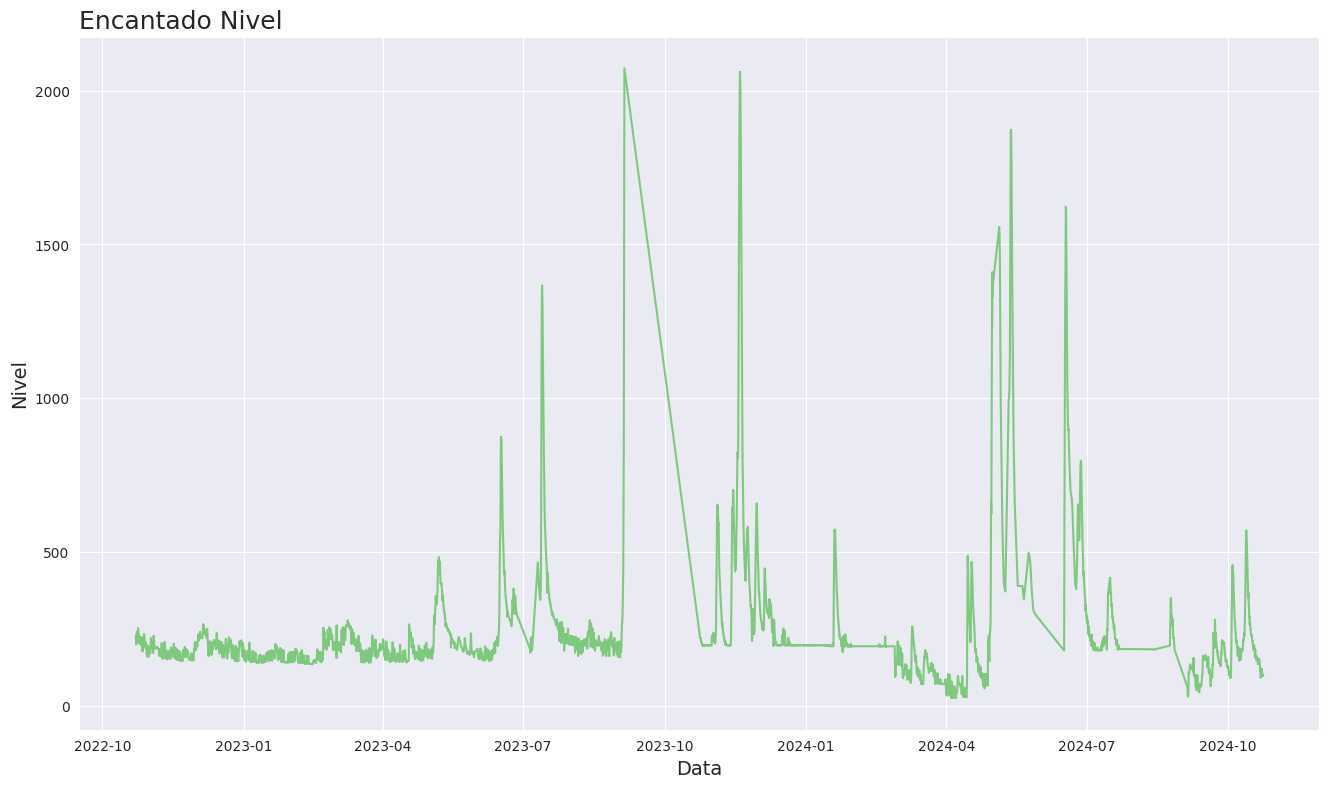

In [71]:
plotar('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico)

In [72]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64815 entries, 0 to 64814
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB
